In [1]:
# To use PCA Algorithm for dimensionality reduction. You have a dataset that includes measurements for different variables on wine (alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data so that most variations in the measurements of the variables are captured by a small number of principal components so that it is easier to distinguish between red and white wine by inspecting these principal components. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
data.shape

(178, 14)

In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [8]:
# Standardization
X = data.drop('Customer_Segment', axis=1)   
y = data['Customer_Segment']                

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

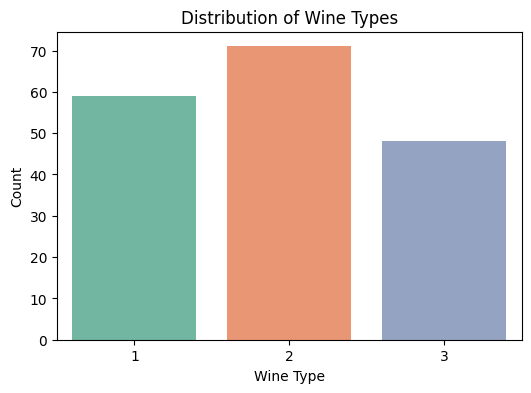

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Wine Types")
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.show

In [10]:
 # Step 5: Train-Test Split
 # ----------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
 X_scaled, y, test_size=0.2, random_state=42, stratify=y
 )

In [11]:
# Step 6: Model WITHOUT PCA
 # ----------------------------------------------------------------
clf_orig = LogisticRegression(max_iter=500)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)


--- Model WITHOUT PCA ---
Accuracy: 0.9722222222222222


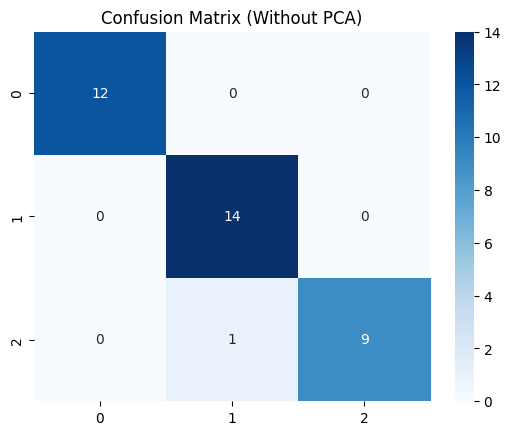

In [23]:
print("\n--- Model WITHOUT PCA ---")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
sns.heatmap(confusion_matrix(y_test, y_pred_orig), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Without PCA)")
plt.show()

In [13]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [14]:
principalDf = pd.DataFrame(data=principal_components, 
                           columns=['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, y.reset_index(drop=True)], axis=1)
print(finalDf.head())

   Principal Component 1  Principal Component 2  Customer_Segment
0               3.316751               1.443463                 1
1               2.209465              -0.333393                 1
2               2.516740               1.031151                 1
3               3.757066               2.756372                 1
4               1.008908               0.869831                 1


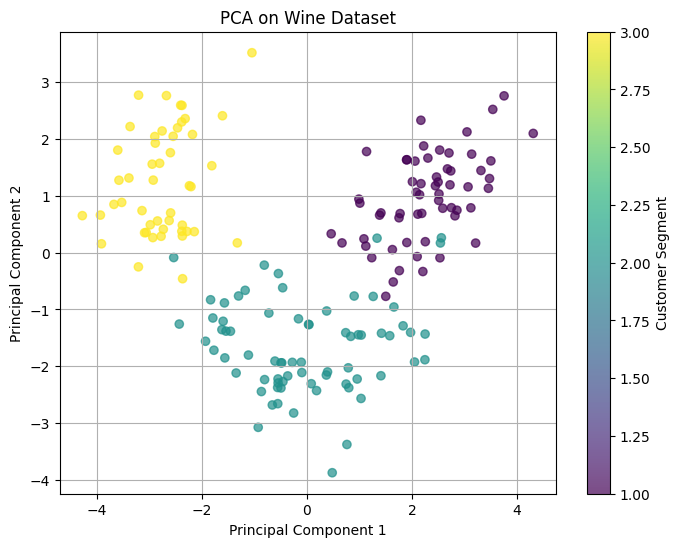

In [15]:
#Visualization
plt.figure(figsize=(8,6))
plt.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'],
            c=finalDf['Customer_Segment'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.colorbar(label='Customer Segment')
plt.grid()
plt.show()

In [16]:
# Variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained by 2 PCs:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.36198848 0.1920749 ]
Total variance explained by 2 PCs: 0.5540633835693527


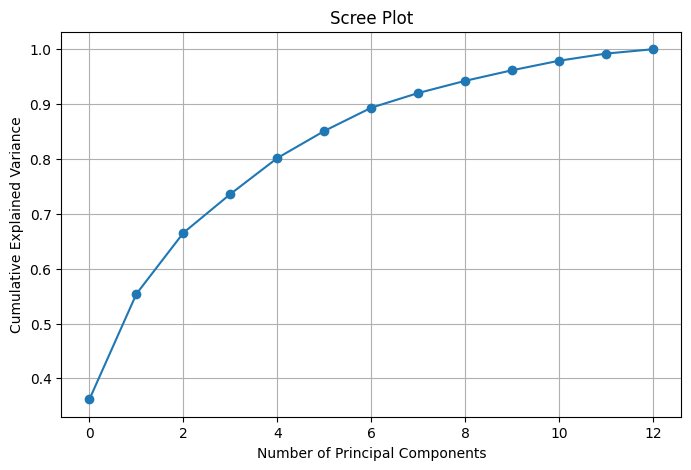

In [17]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [18]:
 # Step 8: Model WITH PCA
Xp_train, Xp_test, yp_train, yp_test = train_test_split(
 principal_components, y, test_size=0.2, random_state=50, stratify=y
 )

In [19]:
clf_pca = LogisticRegression(max_iter=500)
clf_pca.fit(Xp_train, yp_train)
yp_pred = clf_pca.predict(Xp_test)


--- Model WITH PCA ---
Accuracy: 0.9722222222222222


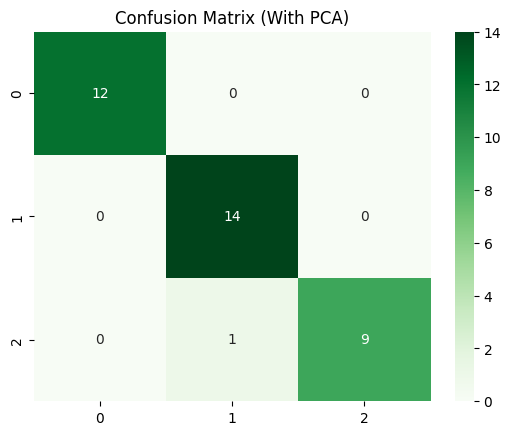

In [20]:
print("\n--- Model WITH PCA ---")
print("Accuracy:", accuracy_score(yp_test, yp_pred))
sns.heatmap(confusion_matrix(yp_test, yp_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix (With PCA)")
plt.show()